In [1]:
import gym
import numpy as np
import pickle
# load the class defining the custom Open AI Gym problem
from uofgsocsai import LochLomondEnv
from gym import spaces
from helpers import *
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Setup the parameters for the specific problem (you can change all of these if you want to)
# problem_id \in [0:7] generates 8 diffrent problems on which you can train/fine-tune your agent
problem_id = 6
# should be less than or equal to 0.0 (you can fine tune this  depending on you RL agent choice)
reward_hole = -0.02
# should be False for A-star (deterministic search) and True for the RL agent
is_stochastic = True
# Load Environment and Q-table structure
env = LochLomondEnv(problem_id=problem_id,
                    is_stochastic= is_stochastic, reward_hole= reward_hole)
state_space_locations, state_space_actions, state_initial_id, state_goal_id = env2statespace(env)
print(state_initial_id)
print(state_goal_id)


S_0_6
S_7_2


In [3]:
# you can decide you rerun the problem many times thus generating many episodes... you can learn from them all!
max_episodes = 10000
# you decide how many iterations/actions can be executed per episode
max_iter_per_episode = 2000

In [4]:
""" This is the random agent """
def random_agent():
    n_states = env.observation_space.n
    random_agent_dict  = {} # define a dict to save random actions
    # set random action to a dict
    for state in range(n_states):
        random_agent_dict[state] = env.action_space.sample()

    print("Print rand item" )
    print(random_agent_dict)
    # return a dict for use 
    return random_agent_dict

In [5]:
random_agent_dict = random_agent()

Print rand item
{0: 0, 1: 3, 2: 1, 3: 0, 4: 3, 5: 3, 6: 3, 7: 3, 8: 1, 9: 3, 10: 1, 11: 2, 12: 0, 13: 3, 14: 2, 15: 0, 16: 0, 17: 0, 18: 2, 19: 1, 20: 2, 21: 3, 22: 3, 23: 2, 24: 0, 25: 1, 26: 1, 27: 1, 28: 1, 29: 0, 30: 1, 31: 0, 32: 3, 33: 0, 34: 3, 35: 1, 36: 2, 37: 3, 38: 3, 39: 0, 40: 2, 41: 3, 42: 0, 43: 1, 44: 3, 45: 1, 46: 3, 47: 3, 48: 2, 49: 3, 50: 0, 51: 1, 52: 1, 53: 1, 54: 3, 55: 0, 56: 3, 57: 2, 58: 0, 59: 3, 60: 3, 61: 2, 62: 3, 63: 2}


In [16]:
reward_random_list = []  # rewards per episode calculate
def evaluate_random():    
    reward_random_accumulate = 0
    reward_random_total = 0
    for episode in range(max_episodes):
        state = env.reset()
        step=0
        reward_random = 0
        for step in range(max_iter_per_episode):

            #action = random_agent_dict.get(state)
            action = env.action_space.sample()
            state, reward, done, info = env.step(action)

            reward_random_accumulate += reward

            if(step == max_iter_per_episode-1):
                print("step over")
            if(done and reward == reward_hole):
                #print("hole :-( ")
                break
            if (done and reward == +1.0):
                reward_random_total = reward + reward_random_total
                #print("We have reached the goal :-) [stop trying to move; we can't]. That's ok we have achived the goal]")
                #print("Number of steps", step)
                break
        reward_random_list.append(reward_random_accumulate)

    print("The total reward is  = " + str(reward_random_total))
    return reward_random_total/max_episodes

In [17]:
# evaluate the random agent
temp1 = evaluate_random()


The total reward is  = 0


Text(0, 0.5, 'reward accumulate')

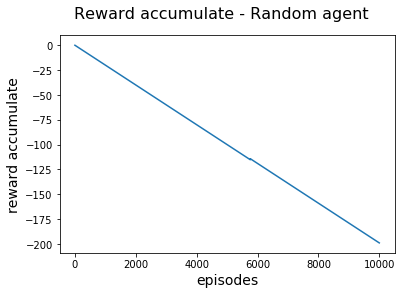

In [8]:
fig = plt.figure()
plt.plot(reward_random_list)
fig.suptitle('Reward accumulate - Random agent', fontsize=16)
plt.xlabel('episodes', fontsize=14)
plt.ylabel('reward accumulate', fontsize=14)

In [9]:
rev_list = []  # rewards per episode calculate
step_list = [] # step number per episode
""" This is the Reinforcement learning agent using tabular Q-learning """
def q_learning_agent():  
    #output_file = f'out_rl_{problem_id}.pkl'
    # initiate Q table
    Q = np.zeros([env.observation_space.n, env.action_space.n])
    # Parameters of Q-leanring
    # learning rate
    eta = 0.1
    # discount rate
    gma = 0.8
    # actions can be executed per episode
    max_iter_per_episode = 2000
    
    # Q-learning Algorithm
    for episode in range(max_episodes):
        # Reset environment
        state = env.reset()
        rewardAll = 0
        j = 0
        #if(episode % 100 == 0):
            #print("learning times: " + str(episode))
        # The Q-Table learning algorithm
        while j < max_iter_per_episode:
            j+=1 
            # Choose an action by greedily (with noise) picking from Q table
            action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n)*(1./(episode+1)))
            # Get new state & reward from environment
            state2, reward, done, info = env.step(action)
            # learn and update Q-Table with new knowledge
            Q[state, action] = Q[state, action] + eta * (reward + gma*np.max(Q[state2, :]) - Q[state, action])
            rewardAll += reward
            state = state2
            if done:
                break
        step_list.append(j)      
        rev_list.append(rewardAll)
            
        # env.render()
    #print("Reward rate on all episodes " + str(sum(rev_list)/1000))
    print("Final Values Q-Table: ")
    print(Q)
    return Q


In [10]:
Q = q_learning_agent()

Final Values Q-Table: 
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.70186200e-03 -7.76268027e-03  5.69167547e-04 -8.00877225e-03]
 [ 3.52818941e-04  3.29287114e-04  2.28269634e-04  3.10947942e-04]
 [ 1.39616044e-04  1.31356969e-04  1.02805466e-04  1.51232790e-04]
 [ 7.98570133e-05 -7.53156253e-03 -9.23661148e-03 -8.20343723e-03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.05017766e-02 -8.99295880e-03  1.09374206e-05 -9.53644518e-03]
 [ 1.26939820e-05  1.31079040e-05  1.20835545e-05  9.41147736e-06]
 [-5.67833688e-03  2.63108275e-03 -5.07182383e-03 -5.63947580e-03]
 [ 1.52392871e-03  5.82632225e-04  3.65884709e-04  5.00635322e-04]
 [-1.12420747e-06  6.69807952e-04  1.59917198e-04  3.03957813e-04]
 [-7.45745446e-03 -7.91318000e-03 -6.18028051e-03  2.59379327e-04]
 [-2.18497751e-04 -5.55618014e-05 -3.62031701e-04  6.88800076e-05]
 [-6.61308363e-03  5.71850919e-06 -9.52507817e-03 -9.00448593e-03]
 [ 1.30587880e-05  1.62714209e-05  1.54

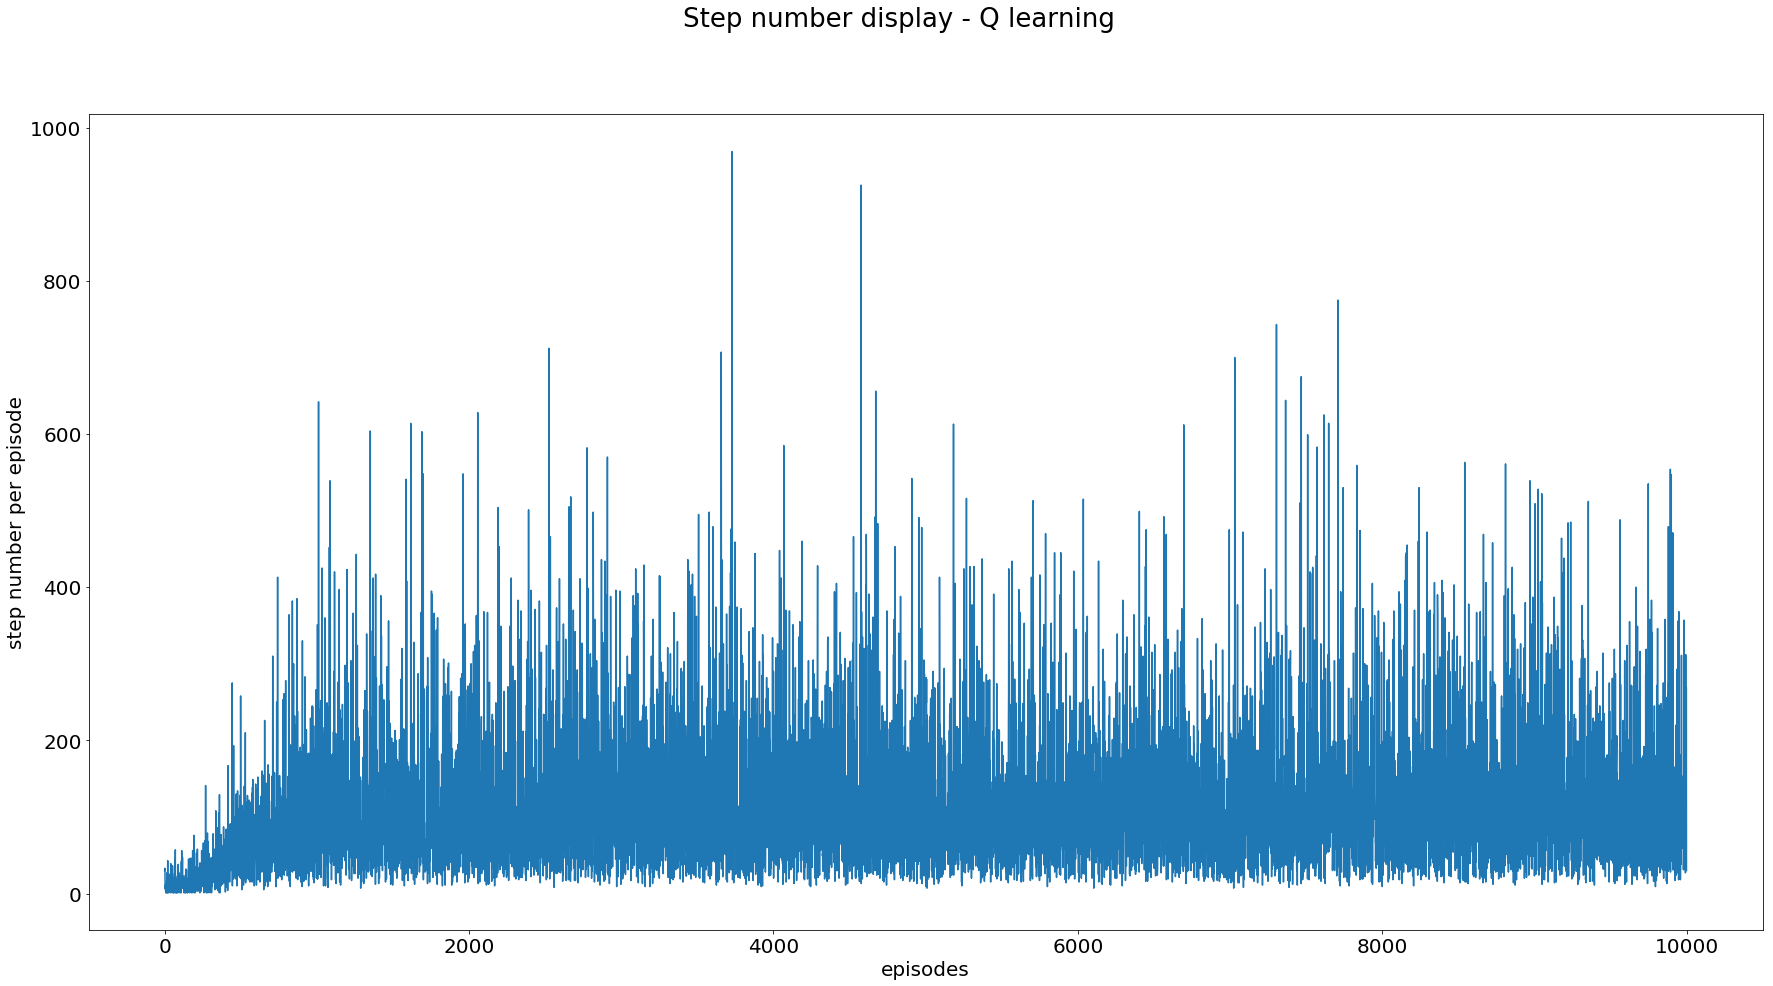

In [11]:
fig = plt.figure(figsize=(30,15))
plt.plot(step_list)
fig.suptitle('Step number display - Q learning', fontsize=26)
plt.xlabel('episodes', fontsize=20)
plt.ylabel('step number per episode', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)


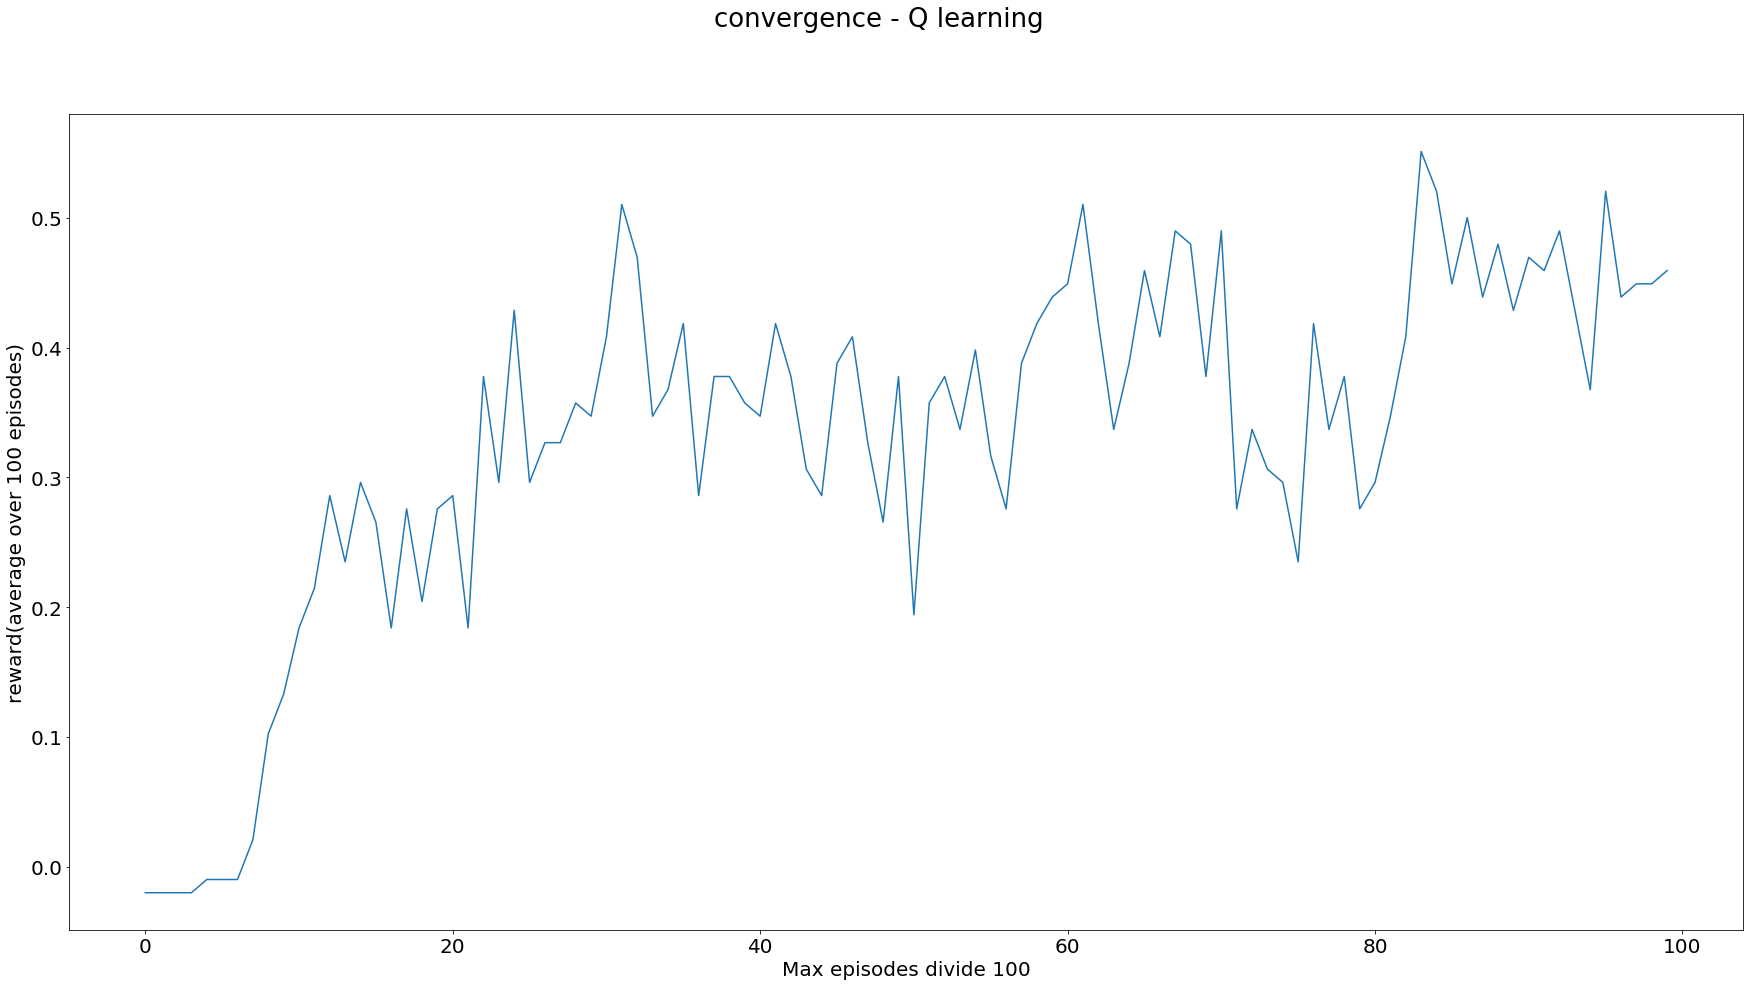

In [12]:

j = 0
score = 0
temp_list = []
for i in rev_list:    
    j=j+1
    score = i+score
    if (j%100 == 0):
        temp_list.append(score/100)
        score = 0
        j = 0
    
fig = plt.figure(figsize=(30,15))
plt.plot(temp_list)
fig.suptitle('convergence - Q learning' ,fontsize=26)
plt.xlabel('Max episodes divide 100',fontsize=20)
plt.ylabel('reward(average over 100 episodes)',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)


In [13]:
rev_q_list = [] 
'''evaluate the learning agent'''
def evaluate_q():
    reward_q_accumulate = 0
    reward_q_total = 0

    for episode in range(max_episodes):
        state = env.reset()
        step=0
        
        for step in range(max_iter_per_episode):

            action = np.argmax(Q[state, :] + np.random.randn(1,env.action_space.n)*(1./(episode+1)))

            state2, reward, done, info = env.step(action)

            reward_q_accumulate += reward

            if(step == max_iter_per_episode-1):
                print("step over")
            if(done and reward == reward_hole):
                #print("hole :-( ")
                break
            if (done and reward == +1.0):
                reward_q_total = reward + reward_q_total
                #print("We have reached the goal :-) [stop trying to move; we can't]. That's ok we have achived the goal]")
                #print("Goal!!!!!Number of steps", step)
                break
            state = state2

        rev_q_list.append(reward_q_accumulate)

    print("The total reward is  = " + str(reward_q_total))


In [14]:
evaluate_q()

The total reward is  = 4026.0


Text(0, 0.5, 'reward accumulate')

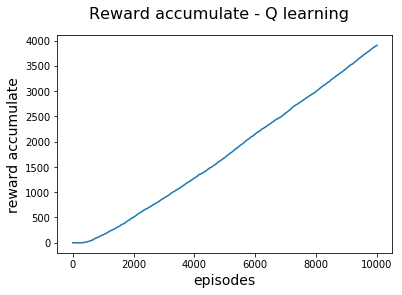

In [15]:
fig = plt.figure()
plt.plot(rev_q_list)
fig.suptitle('Reward accumulate - Q learning', fontsize=16)
plt.xlabel('episodes', fontsize=14)
plt.ylabel('reward accumulate', fontsize=14)
